In [371]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns

import us
from datetime import datetime, timezone

pd.set_option('display.max_columns', 999)

In [372]:
data_path = "C:/Users/armcl/Python/relax_challenge/" #Home

In [433]:
user_engagement = pd.read_csv(data_path + "takehome_user_engagement.csv", encoding="ISO-8859-1")
user_3andmore = user_engagement.groupby('user_id').size()[user_engagement.groupby('user_id').size()>=3].index.tolist()

In [375]:
user_engagement = pd.read_csv(data_path + "takehome_user_engagement.csv", encoding="ISO-8859-1")

In [376]:
user_engagement.shape

(207917, 3)

In [377]:
user_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [378]:

user_engagement = user_engagement.drop(columns=['visited'])
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])

In [379]:
user_engagement['time_stamp'] = user_engagement['time_stamp'].dt.floor('d').astype(np.int64)
user_engagement = user_engagement.sort_values(['user_id', 'time_stamp']).drop_duplicates()

a = user_engagement.groupby('user_id')['time_stamp'].rolling(window=3)
b = pd.to_timedelta((a.max()- a.min())).dt.days
c = list(set(b[b <= 7].index.get_level_values('user_id').tolist()))

In [432]:
c

[8192,
 2,
 8196,
 8201,
 10,
 20,
 8214,
 8217,
 8220,
 8221,
 33,
 8232,
 8233,
 42,
 43,
 8235,
 8239,
 50,
 8243,
 53,
 60,
 8252,
 63,
 8255,
 8258,
 8259,
 69,
 8265,
 74,
 8270,
 80,
 81,
 82,
 8277,
 8278,
 87,
 8280,
 8294,
 8297,
 8310,
 8311,
 8319,
 133,
 135,
 141,
 8334,
 146,
 153,
 8348,
 160,
 165,
 168,
 172,
 174,
 8366,
 8371,
 185,
 188,
 8381,
 8383,
 197,
 200,
 8393,
 202,
 203,
 8394,
 8399,
 209,
 8401,
 8403,
 214,
 8408,
 8415,
 230,
 8426,
 8435,
 245,
 247,
 8440,
 8442,
 8448,
 263,
 265,
 8460,
 8463,
 8466,
 275,
 280,
 283,
 297,
 298,
 8493,
 305,
 310,
 311,
 8505,
 8507,
 8508,
 8511,
 321,
 322,
 8523,
 341,
 345,
 8538,
 347,
 351,
 8553,
 362,
 363,
 370,
 8569,
 8571,
 383,
 8581,
 397,
 401,
 8593,
 8595,
 8601,
 8602,
 418,
 8615,
 430,
 8622,
 445,
 8639,
 8640,
 450,
 460,
 462,
 8654,
 469,
 471,
 472,
 478,
 479,
 8673,
 483,
 8675,
 8677,
 8679,
 492,
 494,
 497,
 8689,
 502,
 8695,
 506,
 509,
 510,
 8701,
 512,
 8704,
 8706,
 8708,
 518

In [384]:
customers = pd.read_csv(data_path + "takehome_users.csv", encoding="ISO-8859-1")
customers.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [385]:
customers['creation_time'] = pd.to_datetime(customers['creation_time'])
customers['last_session_creation_time'] = pd.to_datetime(customers['last_session_creation_time'],unit='s')

customers.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [386]:
customers.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,0.432742,0.356432,124.056723,3383.761968
min,1.00000,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000


In [387]:
#Create a new feature to flag 1 if it's an adopted user

customers['adopted_user'] = 0
customers.loc[customers['object_id'].isin(c),'adopted_user'] = 1

#Create a new feature to calcualte the difference between creation time and last session time
customers['creation_to_last'] = (customers['last_session_creation_time'] - customers['creation_time']).dt.days
customers['creation_to_last'].fillna(0, inplace=True)

#Create a new feature to flag if there's no session
customers['any_session'] = 1
customers.loc[customers['last_session_creation_time'].isnull(),'any_session'] = 0

#Create a new feature to flag if the user is invited by any user
customers['invited_by_any_user'] = 1
customers.loc[customers['invited_by_user_id'].isnull(),'invited_by_any_user'] = 0

#Create a new feature to flag if the user is invited by an adopted user
#customers['invited_by_adopted'] = 0
#customers.loc[customers['invited_by_user_id'].isin(c),'invited_by_adopted'] = 1

#Create a new feature to flag if the user is invited by a non-adopted user
#customers['invited_by_non_adopted'] = customers['invited_by_any_user'] - customers['invited_by_adopted']

#Create a feature to flag if the user is not invited by anyone
#customers['not_invited'] = 0
#customers.loc[customers['invited_by_user_id'].isnull(),'not_invited'] = 1

#Create dummy variables for creation_source
customers = pd.concat([customers, customers['creation_source'].str.get_dummies(sep=',')], axis=1)

#Create dummy variables for org_id
customers_rf = pd.concat([customers, pd.get_dummies(customers['org_id'],
                                                             prefix="org")], axis=1)  

#last_session_creation_time is cheating, drop it
customers = customers.drop(columns=['creation_to_last','object_id','creation_time','name','email','creation_source',
                                   'last_session_creation_time','org_id','invited_by_user_id',
                                   'SIGNUP_GOOGLE_AUTH'])

customers_rf = customers_rf.drop(columns=['creation_to_last','object_id','creation_time','name','email','creation_source',
                                   'last_session_creation_time','org_id','invited_by_user_id',
                                    'SIGNUP_GOOGLE_AUTH'])

customers.head(2)

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,any_session,invited_by_any_user,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP
0,1,0,0,1,1,1,0,0,0
1,0,0,1,1,1,0,1,0,0


In [388]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
adopted_user                  12000 non-null int64
any_session                   12000 non-null int64
invited_by_any_user           12000 non-null int64
GUEST_INVITE                  12000 non-null int64
ORG_INVITE                    12000 non-null int64
PERSONAL_PROJECTS             12000 non-null int64
SIGNUP                        12000 non-null int64
dtypes: int64(9)
memory usage: 843.8 KB


In [389]:
customers.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,any_session,invited_by_any_user,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.249500,0.149333,0.138000,0.735250,0.534750,0.180250,0.354500,0.175917,0.173917
std,0.432742,0.356432,0.344914,0.441218,0.498812,0.384412,0.478381,0.380765,0.379054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [390]:
customers.groupby('adopted_user').mean()

,opted_in_to_mailing_list,enabled_for_marketing_drip,any_session,invited_by_any_user,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP
adopted_user,,,,,,,,
0,0.247970,0.148395,0.692865,0.529196,0.173434,0.355762,0.187452,0.172564
1,0.259058,0.155193,1.000000,0.569444,0.222826,0.346618,0.103865,0.182367


In [391]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

target = ['adopted_user'] 
features = list(customers.drop(['adopted_user'],axis=1).columns)


In [392]:
target

['adopted_user']

In [393]:
features

['opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'any_session',
 'invited_by_any_user',
 'GUEST_INVITE',
 'ORG_INVITE',
 'PERSONAL_PROJECTS',
 'SIGNUP']

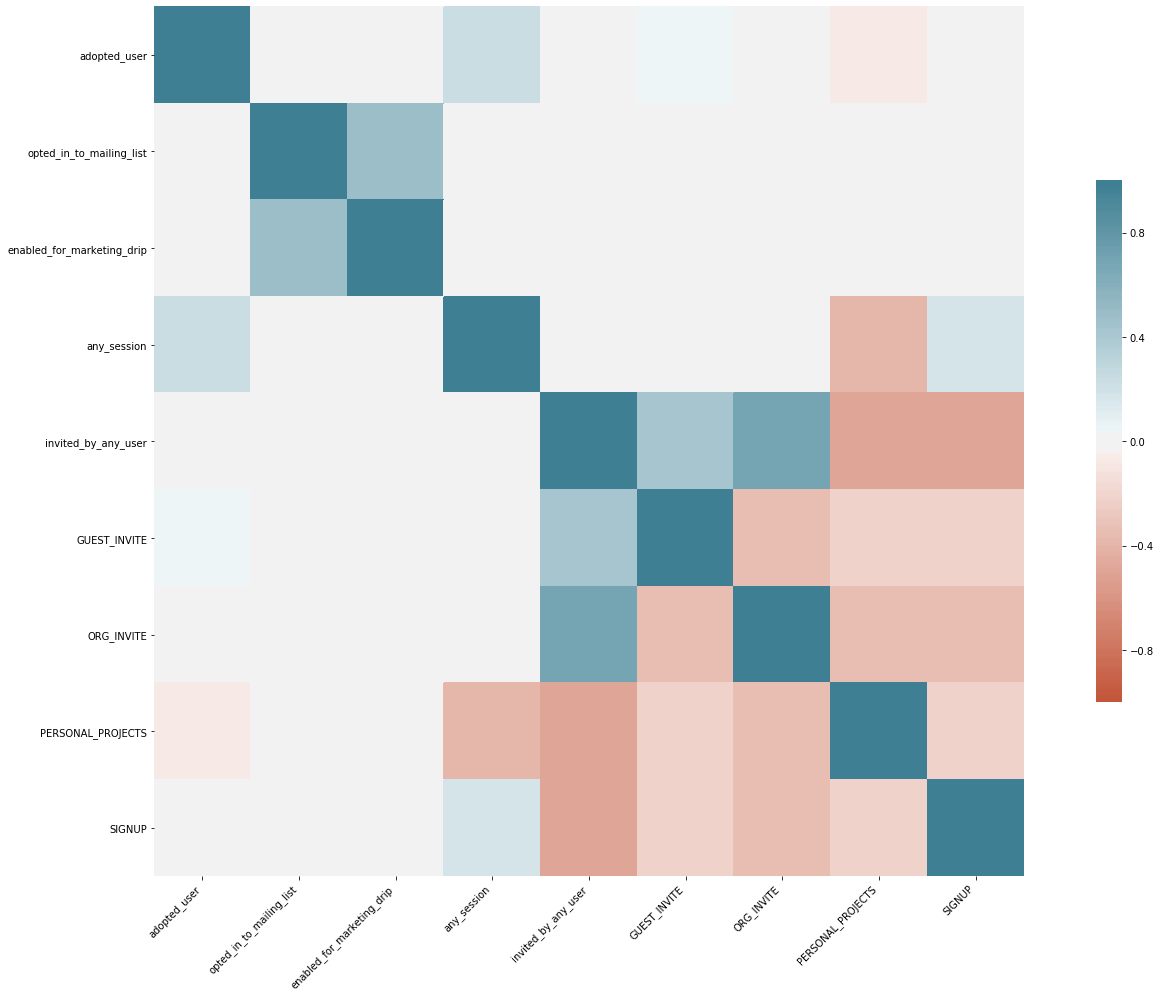

In [394]:
#Make a correlation heatmap

validation = customers[target+features]

plt.figure(figsize=(26, 16))

corr = validation.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, cbar=True,cbar_kws={"shrink": .6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [395]:
from sklearn.linear_model import LogisticRegression
scaler = preprocessing.StandardScaler()

#selected_features = ['any_session','invited_by_adopted']
customers[features] = scaler.fit_transform(customers[features])

#selected_features = ['creation_to_last','any_session']
X = customers[features]
y = customers[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#Use p-value to find the significance of variables
import statsmodels.api as sm
logit_model=sm.Logit(y,X)

result=logit_model.fit()

print(result.summary2())

C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\armcl\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\armcl\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\armcl\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\armcl\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ar

         Current function value: 0.678441
         Iterations: 35
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   -0.691    
Dependent Variable:     adopted_user       AIC:                16296.5750
Date:                   2020-03-25 17:57   BIC:                16348.3237
No. Observations:       12000              Log-Likelihood:     -8141.3   
Df Model:               6                  LL-Null:            -4815.8   
Df Residuals:           11993              LLR p-value:        1.0000    
Converged:              0.0000             Scale:              1.0000    
No. Iterations:         35.0000                                          
-------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------------
opted_in_to_mailing_list    0.0082   0.0212  0.3851 0.7002 -0.0333 0.0496
en

In [396]:
from sklearn.linear_model import LogisticRegression
scaler = preprocessing.StandardScaler()

selected_features = ['any_session','PERSONAL_PROJECTS']

#selected_features = ['creation_to_last','any_session']
X = customers[selected_features]
y = customers[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#Use p-value to find the significance of variables
import statsmodels.api as sm
logit_model=sm.Logit(y,X)

result=logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.679199
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.692    
Dependent Variable: adopted_user     AIC:              16304.7714
Date:               2020-03-25 17:59 BIC:              16319.5567
No. Observations:   12000            Log-Likelihood:   -8150.4   
Df Model:           1                LL-Null:          -4815.8   
Df Residuals:       11998            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
any_session         0.3501   0.0205 17.0970 0.0000  0.3100 0.3903
PERSONAL_PROJECTS   0.0310   0.0203  1.5243 0.1274 -0.0089 0.0708


C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [397]:

print('Accuracy score = ',metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F1 score = ',metrics.f1_score(y_test, y_pred))

Accuracy score =  0.8711111111111111
Precision =  0.0
Recall =  0.0
F1 score =  0.0


C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[3136    0]
 [ 464    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


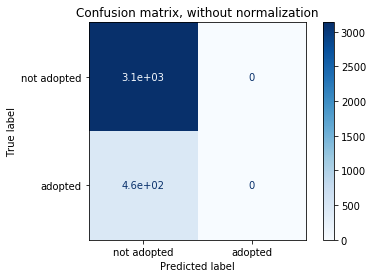

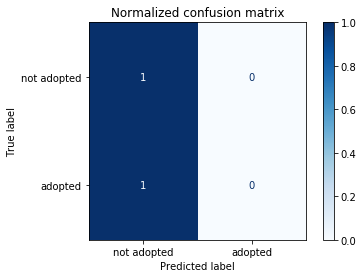

In [364]:
#False Postivie (false alarm) Rate  

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, X_test, y_test,
                                 display_labels=['not adopted','adopted'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

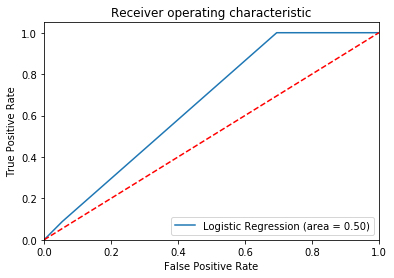

In [398]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1]) #predicted probability of cancellation
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [366]:
pred_prob = y_test.copy(deep=True)
pred_prob['pred_prob'] = logreg.predict_proba(X_test)[:,1]
pred_prob

,adopted_user,pred_prob
10139,0,0.000608
7787,0,0.162443
48,0,0.159656
3305,0,0.242687
5988,0,0.159656
5016,0,0.196887
1574,0,0.000750
10491,0,0.264326
693,0,0.169044
3541,0,0.159656


In [437]:
features

['opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'any_session',
 'invited_by_any_user',
 'GUEST_INVITE',
 'ORG_INVITE',
 'PERSONAL_PROJECTS',
 'SIGNUP',
 'org_0',
 'org_1',
 'org_2',
 'org_3',
 'org_4',
 'org_5',
 'org_6',
 'org_7',
 'org_8',
 'org_9',
 'org_10',
 'org_11',
 'org_12',
 'org_13',
 'org_14',
 'org_15',
 'org_16',
 'org_17',
 'org_18',
 'org_19',
 'org_20',
 'org_21',
 'org_22',
 'org_23',
 'org_24',
 'org_25',
 'org_26',
 'org_27',
 'org_28',
 'org_29',
 'org_30',
 'org_31',
 'org_32',
 'org_33',
 'org_34',
 'org_35',
 'org_36',
 'org_37',
 'org_38',
 'org_39',
 'org_40',
 'org_41',
 'org_42',
 'org_43',
 'org_44',
 'org_45',
 'org_46',
 'org_47',
 'org_48',
 'org_49',
 'org_50',
 'org_51',
 'org_52',
 'org_53',
 'org_54',
 'org_55',
 'org_56',
 'org_57',
 'org_58',
 'org_59',
 'org_60',
 'org_61',
 'org_62',
 'org_63',
 'org_64',
 'org_65',
 'org_66',
 'org_67',
 'org_68',
 'org_69',
 'org_70',
 'org_71',
 'org_72',
 'org_73',
 'org_74',
 'org_75',
 'org_76'

In [399]:
#Try a random forest model

from sklearn.ensemble import RandomForestClassifier

target = ['adopted_user'] 
features = list(customers_rf.drop(['adopted_user'],axis=1).columns)

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100, random_state = 42, 
                                max_depth = 5) #number of trees in the forest

X = customers_rf[features]
#X = subscriptions[essential_features]
y = customers_rf[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

feature_imp = pd.Series(rf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp[0:20]

(8400, 425)
(3600, 425)


C:\Users\armcl\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


any_session                   0.213256
PERSONAL_PROJECTS             0.081532
opted_in_to_mailing_list      0.046572
ORG_INVITE                    0.038340
enabled_for_marketing_drip    0.036740
GUEST_INVITE                  0.036409
invited_by_any_user           0.033838
SIGNUP                        0.029302
org_387                       0.028214
org_0                         0.023019
org_270                       0.021637
org_235                       0.018468
org_289                       0.015660
org_343                       0.013236
org_296                       0.011582
org_281                       0.010850
org_381                       0.010110
org_411                       0.009953
org_177                       0.009588
org_318                       0.009080
dtype: float64

In [400]:
print('Accuracy score = ',metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F1 score = ',metrics.f1_score(y_test, y_pred))

Accuracy score =  0.8711111111111111
Precision =  0.0
Recall =  0.0
F1 score =  0.0


C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[3136    0]
 [ 464    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


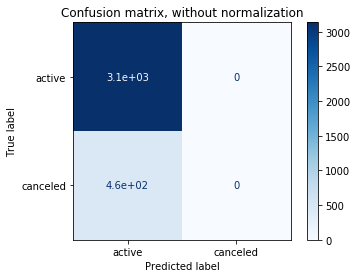

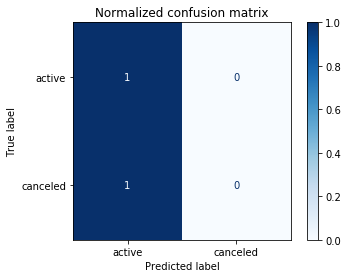

In [401]:
#

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=['active','canceled'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

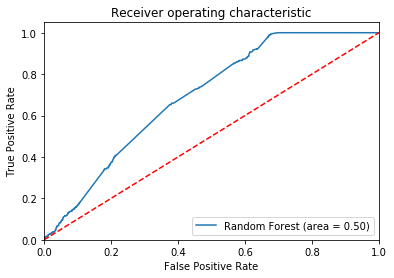

In [402]:
#

logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1]) #predicted probability of cancellation
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve')

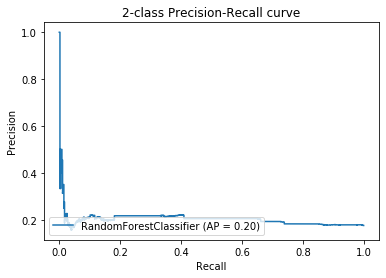

In [408]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.metrics import average_precision_score


disp = plot_precision_recall_curve(rf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

No handles with labels found to put in legend.


Average Precision:  0.20413571900540806


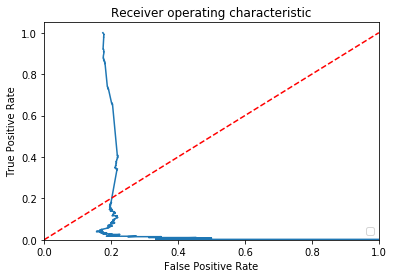

In [421]:
from sklearn.metrics import precision_recall_curve

y_scores = rf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

print('Average Precision: ', average_precision)
plt.figure()
plt.plot(precision, recall)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [431]:
#Use threshold 0.2
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

y_pred_adj = adjusted_classes(y_scores, 0.15)

from sklearn.metrics import confusion_matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                   columns=['pred_neg', 'pred_pos'], 
                   index=['neg', 'pos']))

     pred_neg  pred_pos
neg      1927      1209
pos       158       306
